<a href="https://colab.research.google.com/github/ryaltic/E-Commerce-Time-Series-Forecast/blob/main/E_Commerce_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## E-Commerce Forecasting

## Preprocessing

In [1]:
# Importing pandas library
import pandas as pd

In [2]:
# Reading in the data from github
ecommerce = pd.read_csv("http://raw.githubusercontent.com/ryaltic/E-Commerce-Time-Series-Forecast/refs/heads/main/ecommerce_dataset.csv")

In [3]:
# Showing the head of the dataset
ecommerce.head(n=10)

,Order ID,Product ID,Product Category,Quantity,Unit Price,Total Price,Order Date,Customer ID,Payment Type,Order Status
0,873ff350-854d-4bd8-aebf-6cc5e1a6d3b7,26ab320e-62f2-4203-be68-f8740085d796,Sports & Outdoors,4,154.050509,616.202036,2023-08-02,292fe8cf-4d60-437b-8488-4c225e84d48d,Credit Card,Completed
1,7cb2641e-ea6b-4faf-a7ab-24992d5573fa,8c0d7ba9-1e6b-412a-8359-97d964ad19e5,Home & Kitchen,5,275.539908,1377.699538,2023-09-03,a026178d-e3ed-4d45-a49c-8336479b2114,PayPal,Refunded
2,94e0de8a-419d-46e1-9e7c-65c730b89c65,5d65b6c7-1894-4207-b7e3-b53cc2d5e5e3,Beauty & Health,3,56.410098,169.230294,2023-12-06,808e8010-1552-42dd-a9c5-eacd4fde3283,Debit Card,Cancelled
3,88cc8ccf-f018-46ac-ba3b-f36b5cf4e429,b3f6c6a5-d3cb-49a4-b53b-3996be815c28,Books,2,176.410906,352.821812,2023-07-22,6184896b-4fb2-4ae0-9851-65033dae1319,PayPal,Pending
4,eb520575-720e-456e-9dc5-c2c3bb887bfc,fed52dbf-49c6-4128-8b18-c36e50184a04,Electronics,3,409.892144,1229.676431,2023-04-08,24689017-68fc-42ba-8ae6-f0ad7155e0d6,Credit Card,Cancelled
5,9208a712-e102-4f97-a0e0-345ffc6744cb,1a2e7ec3-4117-487d-9a7c-6793e93a46e8,Home & Kitchen,2,369.059009,738.118017,2023-07-03,f172dd53-ebd6-49cd-8545-3853788e142b,PayPal,Cancelled
6,ada3eefe-8782-4af1-b248-e4aa81a32cf0,25e1a2fe-fca6-4b43-9658-3ee89a5be3a8,Clothing,2,291.943640,583.887280,2023-03-10,eeafe5a1-d9be-4edc-9881-8b60f5eca86d,Credit Card,Pending
7,56866a60-0db6-4e10-9d19-9fbe6ecec552,b7c8000e-79f8-41c6-b689-d9a02fd651fa,Clothing,2,222.608253,445.216506,2023-12-20,8f06c738-60f9-48ff-9279-25d12da8f9b7,Credit Card,Refunded
8,1e0c36b0-1c2b-4ad5-a479-b0ea24fb4824,bf8cc408-2a84-476f-bba8-900c9da435eb,Sports & Outdoors,5,263.039371,1315.196857,2023-10-21,d4ca907b-f84a-460c-9a4d-7819b166dffc,PayPal,Refunded
9,83747baf-e907-4db6-952d-2d8f8fa8f801,0af4a42d-7c59-4d37-8c7a-c22392574b73,Sports & Outdoors,4,116.072443,464.289772,2023-02-19,fec4616d-5ebc-4351-8509-430bdf9c37c4,PayPal,Refunded


This dataset contains information about sales data related to a E-Commerence website and has product category, quantity, unit price, tottal price, date, customer, product, order, payment type and order status.

In [4]:
# Displaying the columns, row counts, and data type
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          10000 non-null  object 
 1   Product ID        10000 non-null  object 
 2   Product Category  10000 non-null  object 
 3   Quantity          10000 non-null  int64  
 4   Unit Price        10000 non-null  float64
 5   Total Price       10000 non-null  float64
 6   Order Date        10000 non-null  object 
 7   Customer ID       10000 non-null  object 
 8   Payment Type      10000 non-null  object 
 9   Order Status      10000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 781.4+ KB


No missing rows and a good amount of text columns with a few numeric columns.

In [5]:
# Looking at the shape of the dataset
ecommerce.shape

(10000, 10)

There are 10,000 rows and 10 columns.

In [6]:
# Checking if Order ID is unique
ecommerce['Order ID'].is_unique

True

In [7]:
# Checking if Customer ID is unique
ecommerce['Customer ID'].is_unique

True

In [8]:
# Checking if Product ID is unique
ecommerce['Product ID'].is_unique

True

In [9]:
# Converting the order date into date column
ecommerce['Order Date'] = pd.to_datetime(ecommerce['Order Date'])

# Adding a bunch of columns based on the date column like Year, Month, etc.
ecommerce = (
    ecommerce
    .assign(
        Year=lambda df: df["Order Date"].dt.year,
        Month=lambda df: df["Order Date"].dt.month,
        Day=lambda df: df["Order Date"].dt.day,
        DayOfWeek=lambda df: df["Order Date"].dt.day_name(),
        WeekOfMonth=lambda df: (df["Order Date"].dt.day.sub(1) // 7) + 1
    )
)

# Adding a weekend variable
ecommerce['Weekend'] = ecommerce['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

In [10]:
ecommerce.head()

,Order ID,Product ID,Product Category,Quantity,Unit Price,Total Price,Order Date,Customer ID,Payment Type,Order Status,Year,Month,Day,DayOfWeek,WeekOfMonth,Weekend
0,873ff350-854d-4bd8-aebf-6cc5e1a6d3b7,26ab320e-62f2-4203-be68-f8740085d796,Sports & Outdoors,4,154.050509,616.202036,2023-08-02,292fe8cf-4d60-437b-8488-4c225e84d48d,Credit Card,Completed,2023,8,2,Wednesday,1,0
1,7cb2641e-ea6b-4faf-a7ab-24992d5573fa,8c0d7ba9-1e6b-412a-8359-97d964ad19e5,Home & Kitchen,5,275.539908,1377.699538,2023-09-03,a026178d-e3ed-4d45-a49c-8336479b2114,PayPal,Refunded,2023,9,3,Sunday,1,1
2,94e0de8a-419d-46e1-9e7c-65c730b89c65,5d65b6c7-1894-4207-b7e3-b53cc2d5e5e3,Beauty & Health,3,56.410098,169.230294,2023-12-06,808e8010-1552-42dd-a9c5-eacd4fde3283,Debit Card,Cancelled,2023,12,6,Wednesday,1,0
3,88cc8ccf-f018-46ac-ba3b-f36b5cf4e429,b3f6c6a5-d3cb-49a4-b53b-3996be815c28,Books,2,176.410906,352.821812,2023-07-22,6184896b-4fb2-4ae0-9851-65033dae1319,PayPal,Pending,2023,7,22,Saturday,4,1
4,eb520575-720e-456e-9dc5-c2c3bb887bfc,fed52dbf-49c6-4128-8b18-c36e50184a04,Electronics,3,409.892144,1229.676431,2023-04-08,24689017-68fc-42ba-8ae6-f0ad7155e0d6,Credit Card,Cancelled,2023,4,8,Saturday,2,1


In [11]:
# Finding the min and max of the date in this dataset
print(ecommerce['Order Date'].min())
print(ecommerce['Order Date'].max())

2023-01-01 00:00:00
2023-12-31 00:00:00


This data only contains a year worth of dates so this may produce some problems with seasonality component as when the data is split the training data won't have any prior information about some months.

In [12]:
# Importing date
from datetime import date

# Making a list of US holidays in 2023
us_holidays_2023 = [
    date(2023, 1, 2),   # New Year's Day (observed)
    date(2023, 1, 16),  # Martin Luther King Jr. Day
    date(2023, 2, 20),  # Presidents' Day
    date(2023, 5, 29),  # Memorial Day
    date(2023, 6, 19),  # Juneteenth
    date(2023, 7, 4),   # Independence Day
    date(2023, 9, 4),   # Labor Day
    date(2023, 10, 9),  # Columbus Day
    date(2023, 11, 10), # Veterans Day (observed)
    date(2023, 11, 23), # Thanksgiving
    date(2023, 12, 25)  # Christmas Day
]

# Adding a column to see if a day is a holiday or not
ecommerce["Holiday"] = ecommerce["Order Date"].isin(us_holidays_2023).astype(int)

/tmp/ipython-input-4175035007.py:20: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ecommerce["Holiday"] = ecommerce["Order Date"].isin(us_holidays_2023).astype(int)


In [13]:
ecommerce.head()

,Order ID,Product ID,Product Category,Quantity,Unit Price,Total Price,Order Date,Customer ID,Payment Type,Order Status,Year,Month,Day,DayOfWeek,WeekOfMonth,Weekend,Holiday
0,873ff350-854d-4bd8-aebf-6cc5e1a6d3b7,26ab320e-62f2-4203-be68-f8740085d796,Sports & Outdoors,4,154.050509,616.202036,2023-08-02,292fe8cf-4d60-437b-8488-4c225e84d48d,Credit Card,Completed,2023,8,2,Wednesday,1,0,0
1,7cb2641e-ea6b-4faf-a7ab-24992d5573fa,8c0d7ba9-1e6b-412a-8359-97d964ad19e5,Home & Kitchen,5,275.539908,1377.699538,2023-09-03,a026178d-e3ed-4d45-a49c-8336479b2114,PayPal,Refunded,2023,9,3,Sunday,1,1,0
2,94e0de8a-419d-46e1-9e7c-65c730b89c65,5d65b6c7-1894-4207-b7e3-b53cc2d5e5e3,Beauty & Health,3,56.410098,169.230294,2023-12-06,808e8010-1552-42dd-a9c5-eacd4fde3283,Debit Card,Cancelled,2023,12,6,Wednesday,1,0,0
3,88cc8ccf-f018-46ac-ba3b-f36b5cf4e429,b3f6c6a5-d3cb-49a4-b53b-3996be815c28,Books,2,176.410906,352.821812,2023-07-22,6184896b-4fb2-4ae0-9851-65033dae1319,PayPal,Pending,2023,7,22,Saturday,4,1,0
4,eb520575-720e-456e-9dc5-c2c3bb887bfc,fed52dbf-49c6-4128-8b18-c36e50184a04,Electronics,3,409.892144,1229.676431,2023-04-08,24689017-68fc-42ba-8ae6-f0ad7155e0d6,Credit Card,Cancelled,2023,4,8,Saturday,2,1,0


## Visualizations

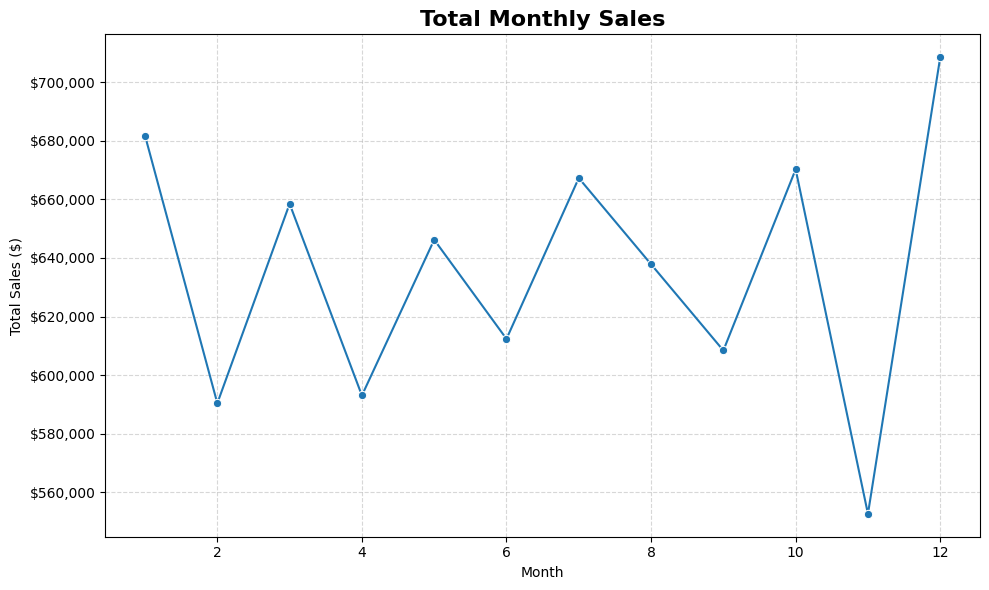

In [14]:
# Importing graphical packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# DF of monthly sales
monthly_sales = (
    ecommerce
    .groupby('Month', as_index=False)['Total Price']
    .sum()
)

plt.figure(figsize=(10, 6))

sns.lineplot(
    x='Month',
    y='Total Price',
    data=monthly_sales,
    marker='o',
    errorbar=None
)

plt.title('Total Monthly Sales', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')

plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



There is clear seasonal aspect of this plot with the total sales constantly going up and down based on the month

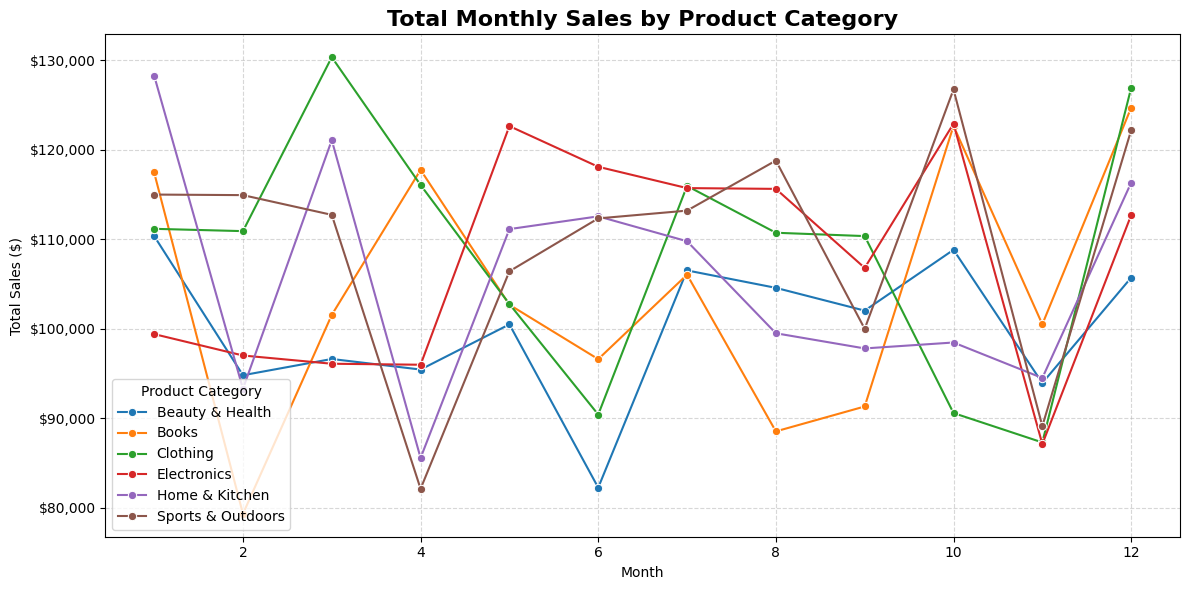

In [15]:
# DF of monthly sales by product category
monthly_sales_category = (
    ecommerce
    .groupby(['Month', 'Product Category'], as_index=False)['Total Price']
    .sum()
)


# Line Chart of total sales by date and product category
plt.figure(figsize=(12, 6))

sns.lineplot(
    x='Month',
    y='Total Price',
    hue='Product Category',
    data=monthly_sales_category,
    marker='o',
    errorbar=None
)

plt.title('Total Monthly Sales by Product Category', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')

plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


No clear trend from this plot as for the most part they follow each others trend

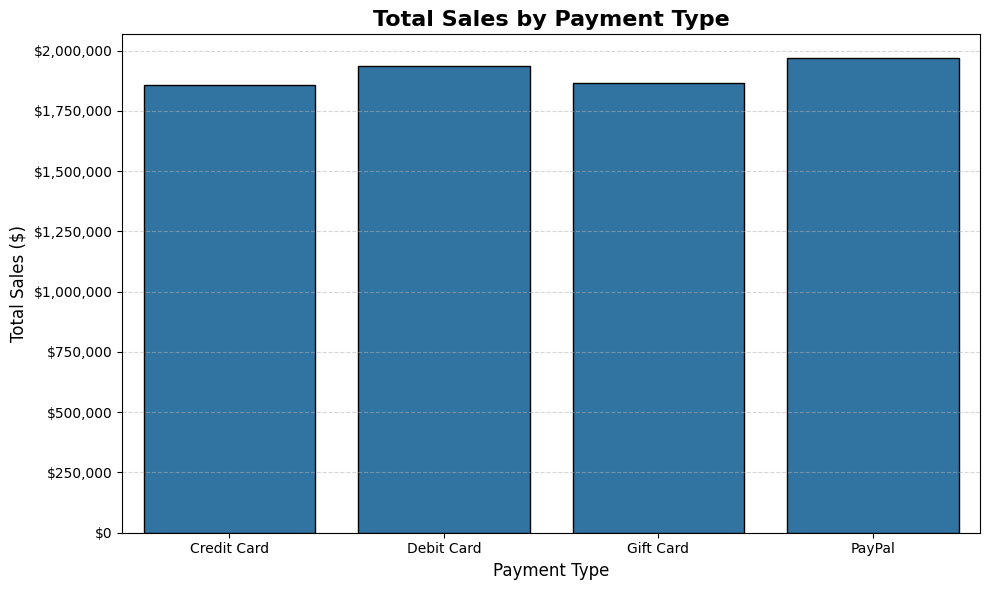

In [16]:
# DF of total sales by payment type
payment_type_sales = (
    ecommerce
    .groupby(['Payment Type'], as_index=False)['Total Price']
    .sum()
)

# Barplot of sales by payment type
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Payment Type',
    y='Total Price',
    data=payment_type_sales,
    edgecolor='black'
)

plt.title('Total Sales by Payment Type', fontsize=16, weight='bold')
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Currency formatting
plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

# Improve readability
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


The sales are roughly the same with debit card and paypal having slightly more than the other methods but nothing major in terms of difference

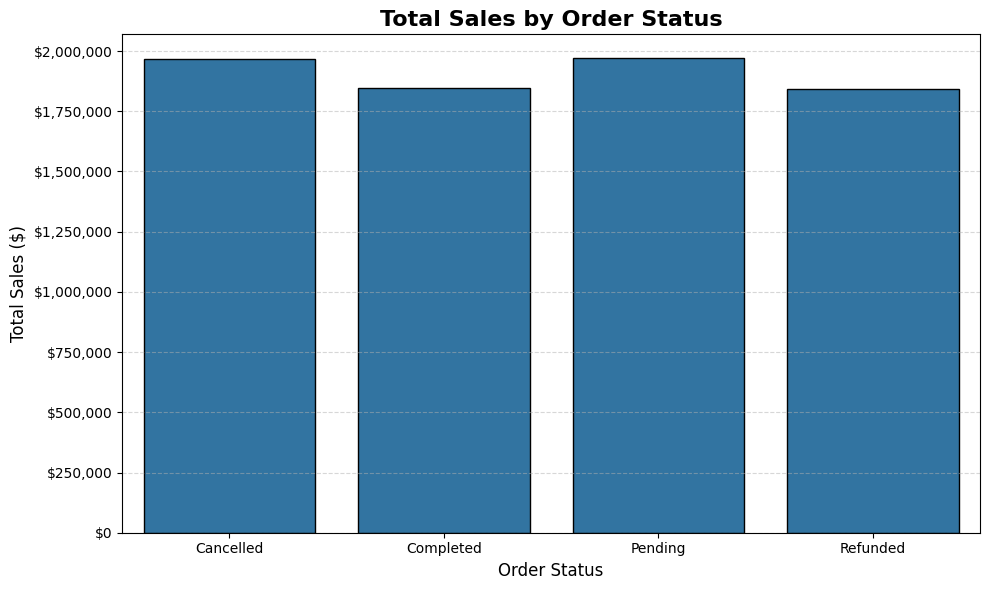

In [17]:
# DF of total sales by order status
order_status_sales = (
    ecommerce
    .groupby(['Order Status'], as_index=False)['Total Price']
    .sum()
)

# Barplot of sales by order status
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Order Status',
    y='Total Price',
    data=order_status_sales,
    edgecolor='black',
    errorbar=None
)

plt.title('Total Sales by Order Status', fontsize=16, weight='bold')
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Currency formatting
plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


There are no major difference in the order status in terms of sales as all of the order status have roughly the same sales

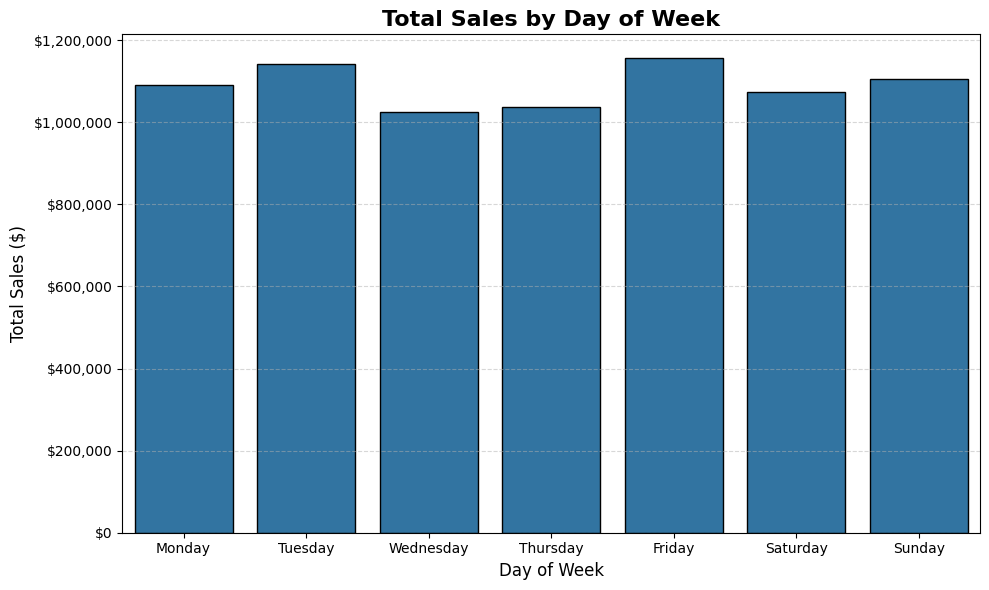

In [18]:
# DF of weekday sales
weekday_sales = (
    ecommerce
    .groupby(['DayOfWeek'], as_index=False)['Total Price']
    .sum()
)

# Barplot of total sales by day of week
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Explicit weekday order
weekday_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

plt.figure(figsize=(10, 6))

sns.barplot(
    x='DayOfWeek',
    y='Total Price',
    data=weekday_sales,
    order=weekday_order,
    edgecolor='black',
    errorbar=None
)

plt.title('Total Sales by Day of Week', fontsize=16, weight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Currency formatting
plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The sales are roughly the same for all of the weekdays with Tuesday and Friday having the most amount of sales compared to the other days but not much more than the others. Wednesday and Thursday had the least amount of sales compared to the other day but nothing major to worry about.

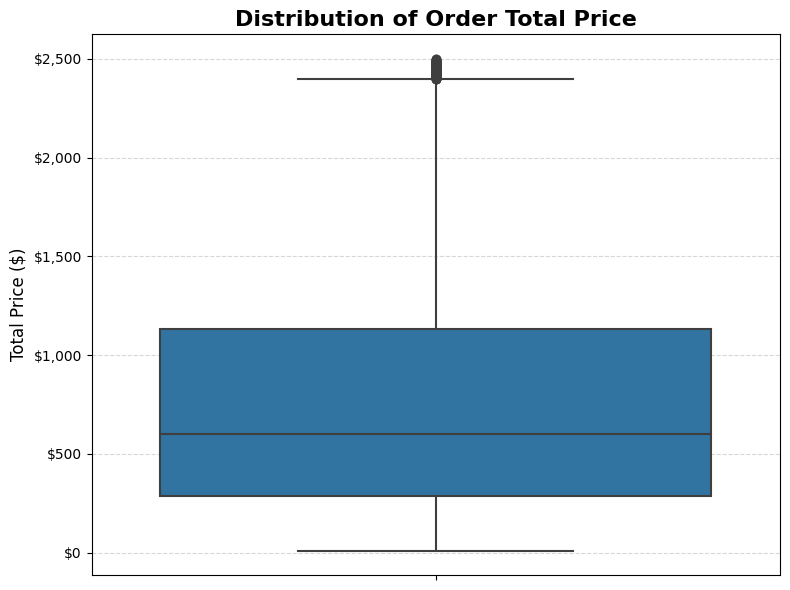

In [19]:
# Boxplot of total price
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=ecommerce,
    y='Total Price',
    showfliers=True,
    linewidth=1.5
)

plt.title('Distribution of Order Total Price', fontsize=16, weight='bold')
plt.ylabel('Total Price ($)', fontsize=12)
plt.xlabel('')

plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Seems to be right skewed however no major outliers and nothing that would need to be removed.

## Splitting into Training and Testing

In [20]:
# Importing the necessary package
from sklearn.model_selection import train_test_split



SyntaxError: invalid syntax (ipython-input-2494350585.py, line 1)